# Estructuras de Datos Avanzadas en Python

En este notebook profundizamos en estructuras avanzadas: **listas enlazadas, árboles y grafos**,
con explicaciones técnicas y visualizaciones automáticas usando `graphviz`.

Estas herramientas son clave para programar de forma eficiente y elegante,
especialmente en problemas con relaciones complejas, estructuras jerárquicas, o grandes volúmenes de datos.

## 1. Linked Lists (Listas enlazadas)
Una **lista enlazada** es una colección de nodos donde cada nodo apunta al siguiente.
- Inserciones y borrados eficientes en cualquier punto (O(1) si tienes el nodo anterior).
- Uso frecuente en pilas, colas y sistemas donde el tamaño cambia constantemente.

**Ventaja:** a diferencia de las listas de Python, no es necesario mover todos los elementos tras un insert/delete.


In [1]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None

    def append(self, data):
        new = Node(data)
        if not self.head:
            self.head = new
            return
        curr = self.head
        while curr.next:
            curr = curr.next
        curr.next = new

    def delete(self, key):
        curr = self.head
        prev = None
        while curr:
            if curr.data == key:
                if prev: prev.next = curr.next
                else: self.head = curr.next
                return True
            prev, curr = curr, curr.next
        return False

    def find(self, key):
        curr = self.head
        while curr:
            if curr.data == key: return curr
            curr = curr.next
        return None

    def __iter__(self):
        curr = self.head
        while curr:
            yield curr.data
            curr = curr.next

ll = LinkedList()
for v in [10, 20, 30, 40]:
    ll.append(v)
print("Lista inicial: ", list(ll))
ll.delete(20)
print("Tras borrar 20: ", list(ll))
print("¿Contiene 30?", ll.find(30) is not None)


Lista inicial:  [10, 20, 30, 40]
Tras borrar 20:  [10, 30, 40]
¿Contiene 30? True


### Visualización de lista enlazada con Graphviz
Requiere instalar la librería `graphviz` (puedes hacer `!pip install graphviz` en tu notebook si hace falta).

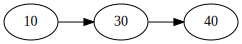

In [2]:
from graphviz import Digraph

def draw_linked_list(ll):
    dot = Digraph()
    dot.attr(rankdir='LR')
    curr = ll.head
    idx = 0
    while curr:
        dot.node(f"n{idx}", label=str(curr.data))
        if curr.next:
            dot.edge(f"n{idx}", f"n{idx+1}")
        curr = curr.next
        idx += 1
    return dot

draw_linked_list(ll)


## 2. Árboles Binarios de Búsqueda (BST)
Un **árbol binario de búsqueda** es una estructura jerárquica: cada nodo tiene como máximo 2 hijos.
- Subárbol izquierdo: todos sus valores < nodo padre.
- Subárbol derecho: todos sus valores > nodo padre.

Permite búsquedas, inserciones y borrados eficientes (**O(log n)** en árboles balanceados).


In [3]:
class BSTNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

    def insert(self, value):
        if value < self.value:
            if self.left: self.left.insert(value)
            else: self.left = BSTNode(value)
        else:
            if self.right: self.right.insert(value)
            else: self.right = BSTNode(value)

    def search(self, value):
        if value == self.value: return True
        elif value < self.value and self.left: return self.left.search(value)
        elif value > self.value and self.right: return self.right.search(value)
        return False

    def inorder(self):
        if self.left: self.left.inorder()
        print(self.value, end=' ')
        if self.right: self.right.inorder()

root = BSTNode(8)
for v in [3, 10, 1, 6, 14, 4, 7, 13]:
    root.insert(v)
print("Recorrido inorden (ordenado):")
root.inorder()
print("\n¿Contiene 6?", root.search(6))


Recorrido inorden (ordenado):
1 3 4 6 7 8 10 13 14 
¿Contiene 6? True


### Visualización de BST con Graphviz

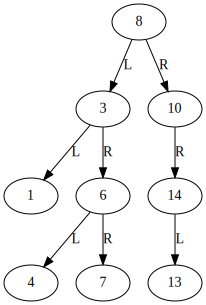

In [4]:
from graphviz import Digraph

def draw_bst(node, dot=None):
    if dot is None:
        dot = Digraph()
        dot.node(str(node.value))
    if node.left:
        dot.node(str(node.left.value))
        dot.edge(str(node.value), str(node.left.value), label='L')
        draw_bst(node.left, dot)
    if node.right:
        dot.node(str(node.right.value))
        dot.edge(str(node.value), str(node.right.value), label='R')
        draw_bst(node.right, dot)
    return dot

draw_bst(root)


**Nota:** En la práctica, se usan árboles balanceados como AVL o Red-Black para evitar degradación a lista en casos patológicos.

## 3. Grafos: conexiones generales
Un **grafo** modela relaciones entre entidades. Los vértices pueden tener cualquier número de conexiones.
Ejemplos: mapas de carreteras, redes sociales, dependencias de paquetes.

Usaremos un diccionario de listas de adyacencia y mostraremos BFS y DFS iterativo.


In [5]:
from collections import deque

G = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D', 'E'],
    'C': ['A', 'B', 'D'],
    'D': ['B', 'C', 'E'],
    'E': ['B', 'D']
}

def bfs(grafo, inicio):
    visitados = {inicio}
    cola = deque([inicio])
    orden = []
    while cola:
        v = cola.popleft()
        orden.append(v)
        for w in grafo[v]:
            if w not in visitados:
                visitados.add(w)
                cola.append(w)
    return orden

def dfs(grafo, inicio):
    visitados = set()
    pila = [inicio]
    orden = []
    while pila:
        v = pila.pop()
        if v not in visitados:
            visitados.add(v)
            orden.append(v)
            for w in reversed(grafo[v]):  # reversed para comportamiento típico de DFS
                if w not in visitados:
                    pila.append(w)
    return orden

print("BFS desde A:", bfs(G, 'A'))
print("DFS desde A:", dfs(G, 'A'))


BFS desde A: ['A', 'B', 'C', 'D', 'E']
DFS desde A: ['A', 'B', 'C', 'D', 'E']


### Visualización de grafo con Graphviz

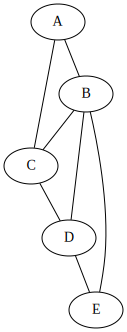

In [6]:
from graphviz import Graph

def draw_graph(g):
    dot = Graph()
    for v in g:
        dot.node(v)
    for v in g:
        for w in g[v]:
            if v < w:  # evitar duplicados en grafo no dirigido
                dot.edge(v, w)
    return dot

draw_graph(G)


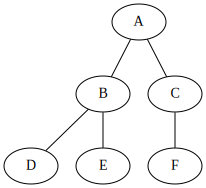

In [9]:
G = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': [],
    'F': []
}
draw_graph(G)


In [8]:
print("BFS desde A:", bfs(G, 'A'))
print("DFS desde A:", dfs(G, 'A'))

BFS desde A: ['A', 'B', 'C', 'D', 'E', 'F']
DFS desde A: ['A', 'B', 'D', 'E', 'C', 'F']


BFS visita por niveles: primero A, luego sus vecinos B y C, después los hijos de B (D, E) y por último F.

DFS profundiza por el último vecino apilado: A → B → D → E (retrocede) → C → F.

## 4. Recursión: factor común en árboles y algoritmos avanzados
La recursión es especialmente útil para árboles, grafos, combinatoria y procesamiento jerárquico.

In [10]:
def factorial(n):
    """Cálculo recursivo del factorial"""
    if n == 0: return 1
    return n * factorial(n - 1)

print("Factorial de 5:", factorial(5))

# Recorrido recursivo de árbol binario (inorden)
def inorder(node):
    if node:
        inorder(node.left)
        print(node.value, end=' ')
        inorder(node.right)

print("Recorrido inorden con recursión:")
inorder(root)


Factorial de 5: 120
Recorrido inorden con recursión:
1 3 4 6 7 8 10 13 14 

## 5. Resumen práctico
- Usa **listas enlazadas** cuando requieras inserciones/borrados frecuentes y acceso secuencial.
- Prefiere **árboles binarios** para búsquedas rápidas y estructuras jerárquicas (archivos, expresiones).
- Utiliza **grafos** para modelar relaciones complejas, dependencias y rutas.
- Domina la **recursión**: esencial para árboles y algoritmos de exploración.
- Visualiza siempre que puedas: ayuda a depurar y comprender.


## 6. Recursos adicionales
- [Documentación oficial de Python: data structures](https://docs.python.org/3/tutorial/datastructures.html)
- [Graphviz: documentación y ejemplos](https://graphviz.readthedocs.io/en/stable/manual.html)
- [Estructuras de datos visuales online](https://visualgo.net/en)